In [1]:
##import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
## load the data set
df = pd.read_csv('Flight_Booking.csv')

In [3]:
#read the dataset
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
## drop the unammed column
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Data Visualization

<Axes: xlabel='airline', ylabel='price'>

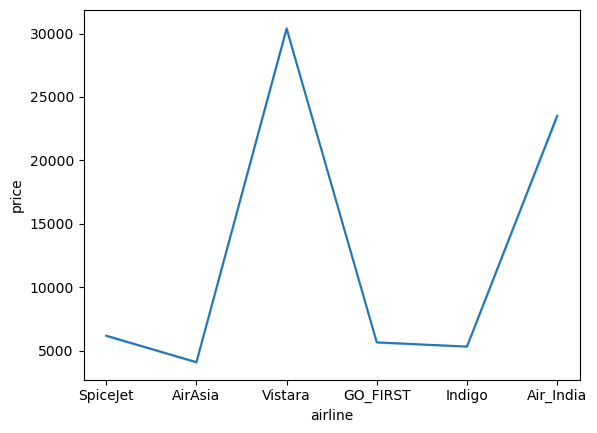

In [9]:
sns.lineplot(x = df['airline'],y= df['price'])

<Axes: xlabel='days_left', ylabel='price'>

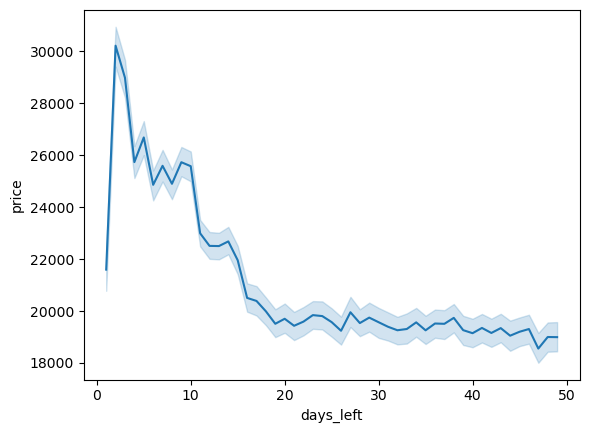

In [10]:
sns.lineplot(x = df['days_left'], y = df['price'])

<Axes: xlabel='airline', ylabel='price'>

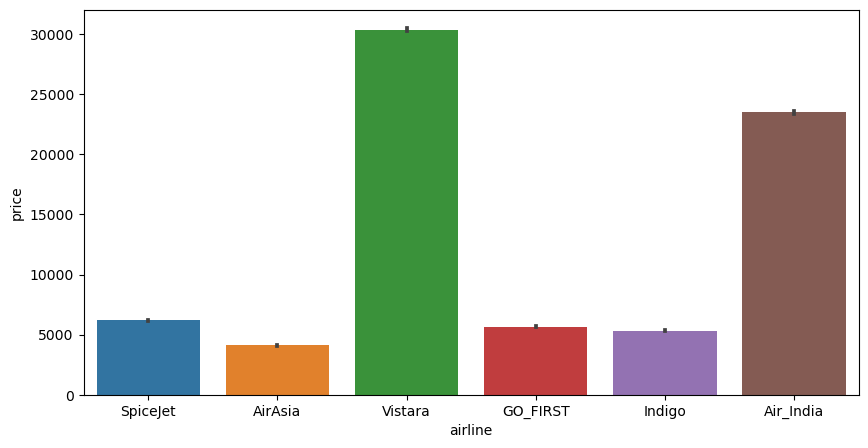

In [11]:
plt.figure(figsize = (10,5))
sns.barplot(x= df['airline'],y= df['price'])

<Axes: xlabel='class', ylabel='price'>

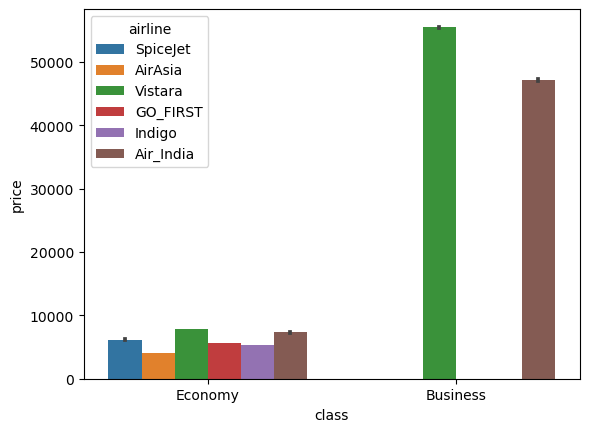

In [12]:
sns.barplot(x = df['class'], y= df['price'], hue = df['airline'])

<Axes: xlabel='days_left', ylabel='price'>

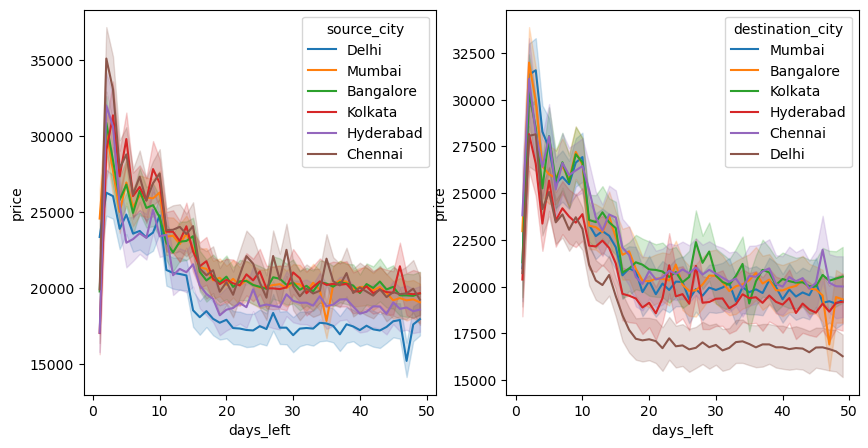

In [13]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.lineplot(x = df['days_left'], y = df['price'], hue= df['source_city'], ax = ax[0])
sns.lineplot(x = df['days_left'], y = df['price'], hue = df['destination_city'],  ax = ax[1])

In [14]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [15]:
## One Hot Encoding

In [16]:
##from sklearn.preprocessing import OneHotEncoder

In [17]:
##df['airline'] = df['airline'].astype('category')

In [18]:
##df['airline_n'] = df['airline'].cat.codes

In [19]:
##df['airline_n']

In [20]:
##air = pd.DataFrame(df['airline_n'])

In [21]:
##enc = OneHotEncoder()

In [22]:
##enc_data = pd.DataFrame(enc.fit_transform(air).toarray())

In [23]:
##enc_data

In [24]:
##New_df = df.join(enc_data) 

In [25]:
##New_df

In [26]:
# encode
from sklearn.preprocessing import LabelEncoder

In [27]:
col_list = df.columns

In [28]:
le=LabelEncoder()
for i in col_list:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

In [29]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


<Axes: >

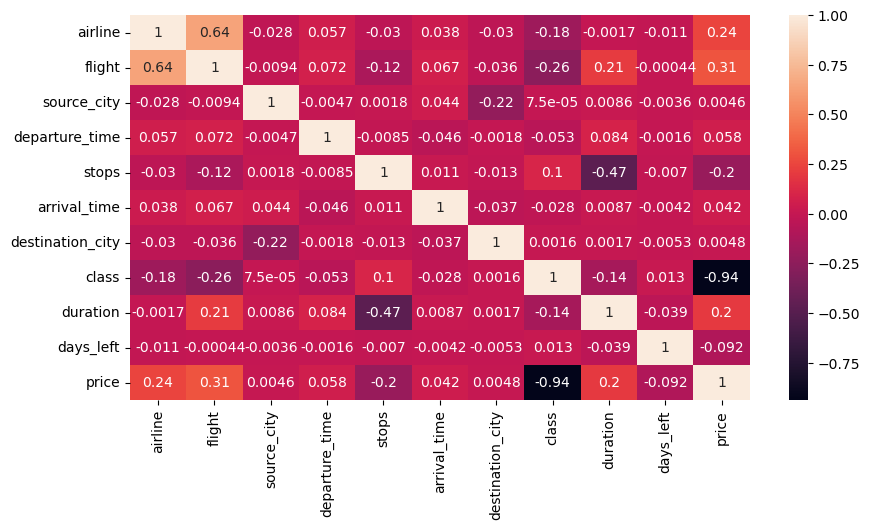

In [30]:
plt.figure(figsize  = (10,5))
sns.heatmap(df.corr(), annot = True)

### Feature Selection

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
col=[]
for i in col_list:
  if ((df[i].dtypes !='object') & (i!='price')):
    col.append(i)

In [33]:
x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [34]:
df.drop(columns =  ['flight'], inplace = True)

In [35]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [36]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='price')):
    col.append(i)
    
x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


### Linear regression

In [37]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, train_size =0.8 , random_state = 100)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
y_train.shape

(240122,)

In [41]:
lr.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(x_test)

In [43]:
y_test

21103     14355
87952      4028
122186     6489
191645     1830
136343    10961
          ...  
4042       2409
11848     12728
82907      4417
234423    31436
100967     2208
Name: price, Length: 60031, dtype: int64

In [44]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9048170149317332

In [45]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)

In [46]:
mean_abs_error

4641.460603082446

In [100]:
from sklearn.metrics import mean_absolute_percentage_error

In [60]:
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred)

In [61]:
mean_absolute_percentage_error

0.4343242370002501

In [62]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)

In [63]:
mean_sq_error

49177483.96324611

In [64]:
root_mean_sq_error = np.sqrt(mean_sq_error)

In [65]:
root_mean_sq_error

7012.665966894909

In [47]:
## plot the actual and predicted

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_3888\1837024562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color = 'green')
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_3888\1837024562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


<Axes: xlabel='price', ylabel='Density'>

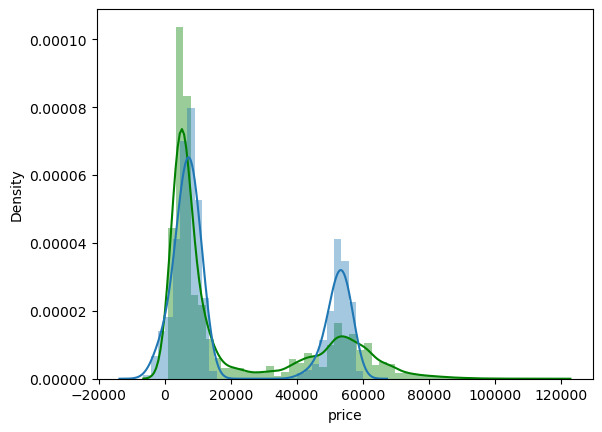

In [123]:
sns.distplot(y_test, color = 'green')
sns.distplot(y_pred)


### Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dt = DecisionTreeRegressor()

In [54]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred_dt = dt.predict(x_test)

In [56]:
r2_score(y_test,y_pred_dt)

0.9765785549556566

In [57]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred_dt)

In [58]:
mean_abs_error

1174.5975468230306

In [101]:
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred_dt)

In [102]:
mean_absolute_percentage_error

0.07472607889258309

In [103]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred_dt)

In [104]:
mean_sq_error

12100983.56589836

In [105]:
root_mean_sq_error = np.sqrt(mean_sq_error)

In [106]:
root_mean_sq_error

3478.6468009699347

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_3888\553838459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_3888\553838459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_dt)


<Axes: xlabel='price', ylabel='Density'>

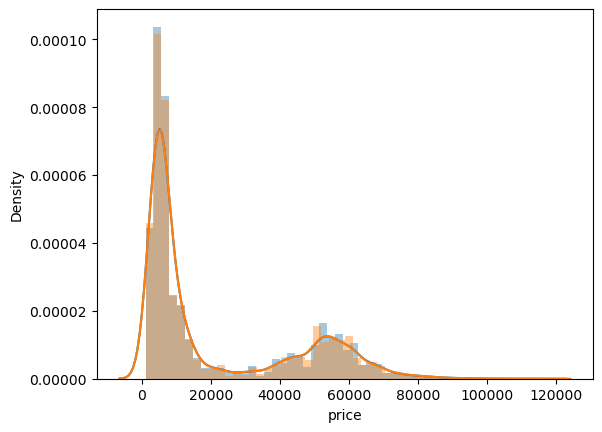

In [122]:
sns.distplot(y_test)
sns.distplot(y_pred_dt)

### Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf  = RandomForestRegressor()

In [75]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
y_pred_rf = rf.predict(x_test)

In [78]:
r2_score(y_test,y_pred_rf)

0.9849371374778447

In [80]:
metrics.mean_absolute_error(y_test,y_pred_rf)

1094.6240506341564

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [111]:
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred_rf)

In [112]:
mean_absolute_percentage_error

0.07075403618109392

In [109]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred_rf)

In [110]:
mean_sq_error

7782416.9896814255

In [93]:
root_mean_sq_error = np.sqrt(mean_sq_error)

In [94]:
root_mean_sq_error

2789.6983689426756

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_3888\1587448966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color = 'green')
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_3888\1587448966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_rf, color = 'red')


<Axes: xlabel='price', ylabel='Density'>

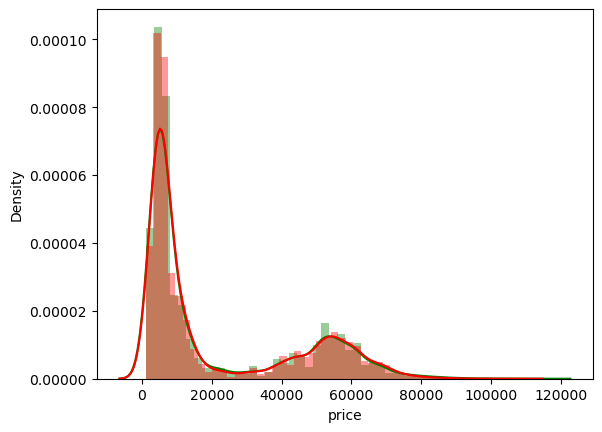

In [117]:
sns.distplot(y_test, color = 'green')
sns.distplot(y_pred_rf, color = 'red')